# Predicting the Next Hit on Billboard Hot 100

This project utilizes data from the EchoNest API to get acoustic features, Musixmatch API to get lyrics, and Billboard API to get ranking of songs.

*****
## Step 1: collect billboard data and do initial exploratory analysis
Songs date as far back as 1958, where I found the first available chart for Hot 100.

In [91]:
# pip install billboard.py

# in this part we want to build up a data frame of all available charts on billboard
import billboard
import pandas as pd

Hot_10 = pd.DataFrame(columns = ['date','title','artist','rank','weeks','change_in_rank','spotifyID'
    ])


chart = billboard.ChartData('hot-100',date = '2010-12-25') # this breaks sometimes so have to rerun and change date
date = chart.date
prev_year,prev_month = date.split('-')[0],date.split('-')[1]

while chart.previousDate:
    year,month = date.split('-')[0],date.split('-')[1]
    if prev_month != month:
        print 'chart year:{},month:{}'.format(year,month)
    for i in range(10):
        song = chart[i]
        Hot_10 = Hot_10.append([(date,song.title,song.artist,song.rank,song.weeks,song.change,song.spotifyID)])
    chart = billboard.ChartData('hot-100',chart.previousDate)
    prev_year,prev_month = year,month
    date = chart.date
    no += 1


chart year:2017,month:02
chart year:2017,month:01
chart year:2016,month:12
chart year:2016,month:11
chart year:2016,month:10
chart year:2016,month:09
chart year:2016,month:08
chart year:2016,month:07
chart year:2016,month:06
chart year:2016,month:05
chart year:2016,month:04
chart year:2016,month:03
chart year:2016,month:02
chart year:2016,month:01
chart year:2015,month:12
chart year:2015,month:11
chart year:2015,month:10
chart year:2015,month:09
chart year:2015,month:08
chart year:2015,month:07
chart year:2015,month:06
chart year:2015,month:05
chart year:2015,month:04
chart year:2015,month:03
chart year:2015,month:02
chart year:2015,month:01
chart year:2014,month:12
chart year:2014,month:11
chart year:2014,month:10
chart year:2014,month:09
chart year:2014,month:08
chart year:2014,month:07
chart year:2014,month:06
chart year:2014,month:05
chart year:2014,month:04
chart year:2014,month:03
chart year:2014,month:02
chart year:2014,month:01
chart year:2013,month:12
chart year:2013,month:11


In [125]:
chart = billboard.ChartData('hot-100',date = '1958-08-09') # this breaks sometimes so have to rerun and change date
date = chart.date
prev_year,prev_month = date.split('-')[0],date.split('-')[1]

while chart.previousDate:
    year,month = date.split('-')[0],date.split('-')[1]
    if prev_month != month:
        print 'chart year:{},month:{}'.format(year,month)
    for i in range(10):
        song = chart[i]
        Hot_10 = Hot_10.append([(date,song.title,song.artist,song.rank,song.weeks,song.change,song.spotifyID)])
    chart = billboard.ChartData('hot-100',chart.previousDate)
    prev_year,prev_month = year,month
    date = chart.date
    no += 1

AttributeError: 'NoneType' object has no attribute 'string'

In [ ]:
Hot_10_dropped = Hot_10.drop(Hot_10.columns.values[7:],axis=1)
Hot_10_dropped.columns = ['date','title','artist','rank','weeks','change_in_rank','spotifyID']
Hot_10_dropped.to_pickle('Billboard_data')

In [10]:
import pandas as pd
top10 = pd.read_pickle('Billboard_data')
top10.head()

,date,title,artist,rank,weeks,change_in_rank,spotifyID
0,2017-03-18,Shape Of You,Ed Sheeran,1.0,8.0,0,0FE9t6xYkqWXU2ahLh6D8X
0,2017-03-18,Bad And Boujee,Migos Featuring Lil Uzi Vert,2.0,16.0,0,1FvU97lrWOG2NRxErh6OZz
0,2017-03-18,I Don't Wanna Live Forever (Fifty Shades Darker),Zayn / Taylor Swift,3.0,12.0,0,6yIdwnpDHufLWgQcveTPMk
0,2017-03-18,That's What I Like,Bruno Mars,4.0,7.0,0,0KKkJNfGyhkQ5aFogxQAPU
0,2017-03-18,Something Just Like This,The Chainsmokers & Coldplay,5.0,2.0,+51,


## Some exploratory data analysis on billboard data to answer 5 questions

### question1: which artist has dominated top 1 for longest weeks in the history? Is it Beatles??

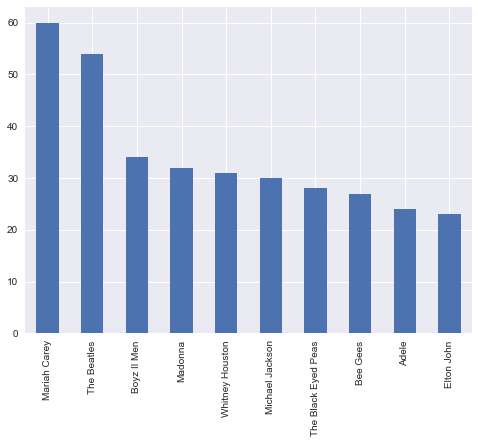

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,6)
top1 = top10[top10['rank']==1.0]
top1.artist.value_counts()[:10].plot(kind='bar')

Turns out Mariah Carey has more times ranked 1 on billboard history! Also this result is not considering many collaborated song Mariah Carey have with Boyz II Men and other artists.

Also some very recent singers like The Black Eyed Peas and Adele both have more than 20 times ranked top 1

### question2: which song is most liked for the longest time? or it topped 1st place for longest continuous weeks, and how long is it? Which song is among top 10 for most of the weeks(not continuously)?

In [73]:
# continuous top 1
top1.head(10)
titles = top1.title.values
artists = top1.artist.values
continuous_weeks = []
count = 1

for i in xrange(1,len(titles)):
    if titles[i] == titles[i-1]:
        count += 1
    else:
        continuous_weeks.append((titles[i-1]+u' by '+artists[i-1],count))
        count = 1
continuous_weeks.sort(key=lambda x:-x[1])
continuous_weeks[:10]

[(u'One Sweet Day by Mariah Carey & Boyz II Men', 16),
 (u'Uptown Funk! by Mark Ronson Featuring Bruno Mars', 14),
 (u'I Gotta Feeling by The Black Eyed Peas', 14),
 (u'Candle In The Wind 1997/Something About The Way You Look Tonight by Elton John',
  14),
 (u'Macarena (Bayside Boys Mix) by Los Del Rio', 14),
 (u'I ll Make Love To You by Boyz II Men', 14),
 (u'I Will Always Love You (From "The Bodyguard") by Whitney Houston', 14),
 (u'The Boy Is Mine by Brandy', 13),
 (u'End Of The Road (From "Boomerang") by Boyz II Men', 13),
 (u'Closer by The Chainsmokers Featuring Halsey', 12)]

Record high goes to 'One Sweet Day' by Mariah Carey & Boyz II Men, lasted four whole months! That's impressive!

How about top 10 songs counting not continuously? Basically just count how many times that song appeared in top 10

In [102]:
# top10.title.value_counts()[:10]
top10.groupby(['title','artist']).size().sort_values(ascending=False)[:10]

title                                artist                                   
How Do I Live                        LeAnn Rimes                                  32
Closer                               The Chainsmokers Featuring Halsey            31
Uptown Funk!                         Mark Ronson Featuring Bruno Mars             31
Smooth                               Santana Featuring Rob Thomas                 30
Party Rock Anthem                    LMFAO Featuring Lauren Bennett & GoonRock    29
Foolish Games/You Were Meant For Me  Jewel                                        28
Truly Madly Deeply                   Savage Garden                                26
Un-Break My Heart                    Toni Braxton                                 25
Apologize                            Timbaland Featuring OneRepublic              25
The Twist                            Chubby Checker                               25
dtype: int64

In this way we get to know more less famous artists, and we also learn this:

being able to stay the longest weeks as top 1 does not necessarily mean you can also stay the longest in top 10 chart. For example in the above table, we can't find any Mariah Carey song.

### question3: which artist's tracks likes to bomb the chart?(i.e. become top 1 once released)

In [29]:
# define the bomb: rank = 1 and weeks = 1, if on chart for the first week it has ranked top 1 then it's a bomb
top1[top1.change_in_rank==u"Hot Shot Debut"]

,date,title,artist,rank,weeks,change_in_rank,spotifyID
0,2017-01-28,Shape Of You,Ed Sheeran,1.0,1.0,Hot Shot Debut,0FE9t6xYkqWXU2ahLh6D8X
0,2016-05-28,Can't Stop The Feeling!,Justin Timberlake,1.0,1.0,Hot Shot Debut,6JV2JOEocMgcZxYSZelKcc
0,2016-02-20,Pillowtalk,Zayn,1.0,1.0,Hot Shot Debut,0IKK48xF4eEdfofyaeKWWO
0,2015-11-14,Hello,Adele,1.0,1.0,Hot Shot Debut,1MDoll6jK4rrk2BcFRP5i7
0,2015-09-19,What Do You Mean?,Justin Bieber,1.0,1.0,Hot Shot Debut,1ds2QsfhAAfRiaFMGDzrdb
0,2014-09-06,Shake It Off,Taylor Swift,1.0,1.0,Hot Shot Debut,7zCCVZBgy3Ij5fX7S4fs60
0,2013-03-02,Harlem Shake,Baauer,1.0,1.0,Hot Shot Debut,2eP6GhdRE1Ydnw2uXzo7q8
0,2012-03-03,Part Of Me,Katy Perry,1.0,1.0,Hot Shot Debut,1nZzRJbFvCEct3uzu04ZoL
0,2011-02-26,Born This Way,Lady Gaga,1.0,1.0,Hot Shot Debut,0FC7X3BRdEJC8L4ZEUAv2Q
0,2011-01-29,Hold It Against Me,Britney Spears,1.0,1.0,Hot Shot Debut,6CnuehRR8GVXJfzCs25GX9


### It's interesting that all these songs come from 21st century. 
Maybe one of the reason is that listeners' access to good songs nowadays has increased compared with the situation in the past, where the spreading speed of songs could be much slower than now.

Another reason could be that people tend to spend more time listening to music made by artists they are familiar with. In this case, a well known musician is more likely to make a bomb song nowadays, since it will definitely attract much more traffic than those less known musicians.

### question4: continued from above analysis on songs' total number of weeks on the billboard chart, how has the total number changed over time? If decreased we could conclude the competition has increased over the years

In [143]:
# for every song in the chart, get the largest weeks number, then analyze their relationship with date
top10['year'] = map(lambda x:x.split('-')[0],top10.date.values)
song_weeks = {}
for i in xrange(len(top10)):
    title_artist,week,year = top10.title.iloc[i]+u' by '+top10.artist.iloc[i],top10.weeks.iloc[i],top10.year.iloc[i]
    if title_artist not in song_weeks:
        song_weeks[title_artist] = (week,year)
    
song_weeks = pd.DataFrame(song_weeks.values(),song_weeks.keys(),columns = ['weeks','year'])
song_weeks.head(2)

,weeks,year
Sensitivity by Ralph Tresvant,20.0,1991
That's All You Gotta Do by Brenda Lee,14.0,1960


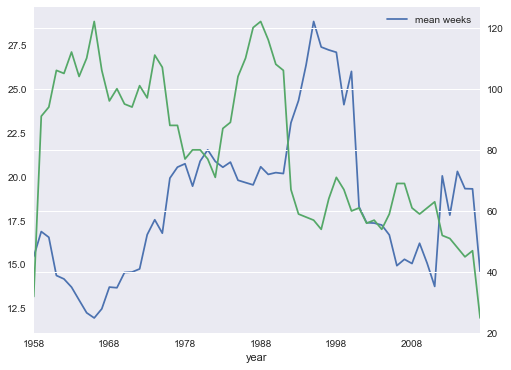

In [171]:
fig,ax = plt.subplots()
song_weeks.groupby('year').mean().plot(ax=ax,kind='line',sharex = True,label='mean weeks')
song_weeks.groupby('year').size().plot(ax=ax,kind='line',sharex = True,secondary_y=True,label='total songs')
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, ['mean weeks','total songs'], loc='best') # why it's not showing the second label?!
plt.show()

Green lines are number of unique songs appeared in the chart, blue lines show average number of weeks within that year. 

We can find something interesting here. 

1.Total unique songs on the billboard chart is decreasing, which means the competition to get on board is not as intense as in the 1980s or 1960s! 

2.However, even if the number of songs competing for top 10 is decreasing, average weeks a song can stay on top 10 chart is decreasing, especially compared to the data in 1990s, where there are more songs than now, and at the same time they stay longer on top 10 chart.

### question5: are songs performed by collaborated artists becoming more popular than before?

In [11]:
artists = top10.artist.values

In [19]:
import re
artist_pairs = map(lambda x:re.split(" Featuring | \/ | \& | x ",x),artists)

In [168]:
top10['n_artists'] = [len(i) for i in artist_pairs]

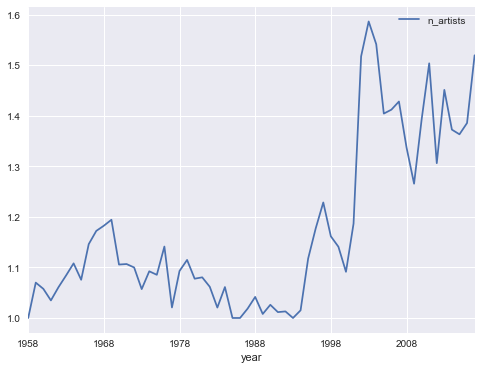

In [210]:
test = top10[['title','n_artists','year']].groupby(['year','title']).mean()
unique_song_table = pd.DataFrame(zip(test.index.get_level_values('year'),test.n_artists),columns = ['year','n_artists'])
unique_song_table.groupby('year').mean().plot(kind='line')

We can see more artists collaboration work on the top 10 charts!

*****
## Step 2: Integrate Billboard data with audio features and lyrics, do more  exploratory analysis

Before we integrate, we need to filter out those without a spotify id, around 5% of the unique songs are not in the billboard top 10 charts so it's not a big impact on our future analysis.

In [38]:
(len(set(top10.title))-len(set(top10.spotifyID))-1)/float(len(set(top10.title)))

0.05326231691078562

### Get Spotify Audio Features Data

In [182]:
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session
import time,json
import pandas as pd

In [207]:
def get_token():
    auth_url = u'https://accounts.spotify.com/api/token'

    ##### private information #####
    client_id = u'client_id_string_here'
    client_secret = u'client_secret_string_here'
    ##### wipe if publish in public #####
    client = BackendApplicationClient(client_id=client_id)
    oauth = OAuth2Session(client=client)
    token = oauth.fetch_token(token_url=auth_url, client_id=client_id,
        client_secret=client_secret)

    return token

def get_spotify_json(url,token=None):
    if token['expires_at']-time.time() < 100 or not token: # if token less than 100 seconds until expiration
        token = get_token()

    access_token = token['access_token']
    header = {u'Authorization':u'Bearer '+access_token}

    r = requests.get(url,headers=header)
    return r.json(),token

def single_audio_features(track_id,token=None):
    url_head = u'https://api.spotify.com/v1/audio-features/'

    if type(track_id) == str:
        url = url_head + track_id
    else:
        raise TypeError("Track_id should be str!")

    r,token = get_spotify_json(url,token)
    table = pd.DataFrame([r])
    table.drop(['analysis_url','id','track_href','type'],axis=1,inplace=True)
    return table,token
    
def multiple_audio_features(track_ids,token=None):
    url_head = u'https://api.spotify.com/v1/audio-features?ids='

    url = url_head + ','.join(track_ids)

    rs,token = get_spotify_json(url,token)
    table = pd.DataFrame()
    for r in rs['audio_features']:
        row = pd.DataFrame([r])
        row.drop(['analysis_url','id','track_href','type'],axis=1,inplace=True)
        table = table.append(row)

    return table,token


In [147]:
top10_spotify = top10[top10.spotifyID != u'']
distinct_trackids = list(set(top10_spotify.spotifyID.values))
# same named songs are as many as 250!

In [286]:
# example of not consistent artist name(uppercase vs lowercase)
# top10_spotify[top10_spotify.spotifyID==u'3FWPoYBDserKdzcattMFGa']

In [293]:
print len(distinct_trackids)
audio_data = pd.DataFrame()

4264


In [291]:
def chunk_100(series):
    for i in xrange(0,len(series),100):
        yield series[i:(i+100)]
    

In [299]:
import os.path

if not os.path.isfile('Spotify_audio_features'):
    for i,track_ids in enumerate(chunk_100(distinct_trackids)):
        audio_features,token = multiple_audio_features(track_ids,token)
        audio_data = audio_data.append(audio_features)
        
    assert len(audio_data)==len(distinct_trackids)
    audio_data.to_pickle('Spotify_audio_features')

else:
    audio_data = pd.read_pickle('Spotify_audio_features')

In [300]:
audio_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,uri,valence
0,0.767000,0.588,136040,0.736,0.000000,8,0.3510,-7.760,0,0.0461,132.731,4.0,spotify:track:6vJOIceKD99L4Z2jyOE1m7,0.838
0,0.000712,0.695,214840,0.915,0.000000,0,0.0311,-3.549,1,0.0497,141.019,4.0,spotify:track:7aBVQ8dcHytEddV0SlDrcQ,0.899
0,0.060700,0.386,173547,0.642,0.005070,2,0.0675,-5.767,1,0.0461,168.515,4.0,spotify:track:6NimgfBPonkKO8yep1pFzQ,0.704
0,0.732000,0.490,208760,0.319,0.000024,10,0.1050,-14.069,1,0.0384,80.181,4.0,spotify:track:6eVAEqfTAe6FmPcwY7hhnG,0.337
0,0.209000,0.834,245373,0.701,0.000000,5,0.1860,-6.132,0,0.2130,96.682,4.0,spotify:track:4YA7nxDtAVE2R1Eryx7uRu,0.831


### Get lyrics from lyrics.wikia.com

According to the original plan I was to get the lyrics from Musixmatch, but for their free version they only provide 30% of the lyrics per song, and has a quota of 2000 songs per day. So I looked for other resources and found this website, and scraped from its html code
link to the website:
http://lyrics.wikia.com/

In [182]:
import requests
import re
import urllib
from bs4 import BeautifulSoup

def get_lyric(title,artist):
    url_head = u'http://lyrics.wikia.com/wiki/'
    url = url_head+urllib.quote(artist)+':'+urllib.quote(title)
    r = requests.get(url)
    soup = BeautifulSoup(r.text,'html.parser')
    lyricbox = soup.find('div',class_ = 'lyricbox')
    lyric = re.sub('<.?div.*?>','',str(lyricbox))
    lyric = re.sub('<br/>','.',lyric)
    return lyric


In [174]:
artists = top10_spotify.artist.values
titles = top10_spotify.title.values
title_artist_pairs = map(lambda (x,y):(x.lower(),y.lower()),zip(titles,artists))
unique_title_artist_pairs = list(set(title_artist_pairs)) # 4314 unique pairs
unique_titles,unique_artists = zip(*unique_title_artist_pairs)
lyrics_data = pd.DataFrame()

In [272]:
import os.path
if not os.path.isfile('lyrics_data_round1'):
    lyrics_data = pd.DataFrame()
    artists_filter1 = map(lambda x:re.split('with| \(|\)',x),unique_artists)
    left_over = []
    for i,(title,artist) in enumerate(zip(unique_titles,artists_filter1)):
        if i % 50 == 0:
            print i,title,artist[0]
        lyric = get_lyric(title,artist[0])
        if lyric == 'None':
            left_over.append((title,unique_artists[i]))
        else:
            row = pd.DataFrame({'title':title,'artist':artist,'lyric':lyric})
            lyrics_data = lyrics_data.append(row)
    lyrics_data.to_pickle('lyrics_data_round1')
else:
    lyrics_data = pd.read_pickle('lyrics_data_round1')
    artists = top10_spotify.artist.values
    titles = top10_spotify.title.values
    title_artist_pairs = map(lambda (x,y):(x.lower(),y.lower()),zip(titles,artists))
    unique_title_artist_pairs = list(set(title_artist_pairs)) # 4314 unique pairs
    left_over = []
    for i in unique_title_artist_pairs:
        if i not in zip(lyrics_data.title.values,lyrics_data.artist.values):
            left_over.append(i)


In [273]:
len(lyrics_data)

3469

In [274]:
len(left_over)

943

In [276]:
# lyrics_data = pd.read_pickle('lyrics_data_round1')
unique_titles,unique_artists = zip(*left_over)
artists_filter2 = map(lambda x:re.split(" featuring | \/ | \& | x ",x),unique_artists)
left_over2 = []
for i,(title,artist) in enumerate(zip(unique_titles,artists_filter2)):
    if i % 50 == 0:
        print i,title,artist[0]
    lyric = get_lyric(title,artist[0])
    if lyric == 'None':
        left_over2.append((title,unique_artists[i]))
    else:
        row = pd.DataFrame({'title':title,'artist':artist,'lyric':lyric})
        lyrics_data = lyrics_data.append(row)
print len(left_over2)
lyrics_data.to_pickle('lyrics_data_round2')

0 beth/detroit rock city kiss
50 what goes around...comes around justin timberlake
100 i can t dance genesis
150 stop stop stop the hollies
200 star wars (main title) london symphony orchestra
250 tonight (i'm lovin' you) enrique iglesias
300 that lady (part 1) the isley brothers
350 bust it baby part 2 plies
400 i don't wanna live forever (fifty shades darker) zayn
450 careless whisper wham!
500 leather and lace stevie nicks with don henley
550 jacob s ladder huey lewis
600 itsy bitsy teenie weenie yellow polkadot bikini brian hyland
650 crazy in love beyonce
700 carrie-anne the hollies
750 my baby lil' romeo
800 down jay sean
850 wiggle jason derulo
900 my love is the shhh! somethin' for the people
639


In [277]:
len(left_over2)

639

In [304]:
def get_spotify_ids(names,table):
    '''
    in: [(title,artist),...]
        pd.DataFrame with spotifyID
    out: [spotifyID,...]
    '''
    spotifyIDs = []
    for i in names:
        spotifyID = table[i]
        spotifyIDs.append(spotifyID)
    return spotifyIDs

def spotify_id_lookup(table):
    distinct_records = set(zip(table.title,table.artist,table.spotifyID))

    lookup_table = {}
    for record in distinct_records:
        title,artist,spotifyID = record[0].lower(),record[1].lower(),record[2]
        lookup_table[(title,artist)] = spotifyID

    return lookup_table



def chunk_50(series): # requesting track info needs smaller size of requests
    for i in xrange(0,len(series),50):
        yield series[i:(i+50)]
    
    
def correct_names_spotify(names,spotifyIDs):
    '''
    in: [(title,artist),...]
    out: [(c_title,c_artist),...]
    '''
    spotify_names = get_spotify_names(spotifyIDs)
    
    corrected,not_corrected = [],[]
    for i in spotify_names:
        if i not in names:
            corrected.append(i)
        else:
            not_corrected.append(i)
    return corrected,not_corrected

def get_spotify_names(spotifyIDs):
    '''
    in: [ids,...]
    out: [(title,artist),...]
    '''
    names = []
    
    for chunked_spotifyIDs in chunk_50(spotifyIDs):
        url_head = 'https://api.spotify.com/v1/tracks/?ids='
        detail = ','.join(chunked_spotifyIDs)
        url = url_head+detail
        r = requests.get(url)
        track_lists = r.json()['tracks']

        for track in track_lists:
            title = track['name'].lower()
            artist = track['artists'][0]['name'].lower()# only get first artist for now
            names.append((title,artist))
    return names

left_over2_spotifyIDs = get_spotify_ids(left_over2,spotify_id_lookup(top10_spotify))

corrected_names,left_over3 = correct_names_spotify(left_over2,left_over2_spotifyIDs)


In [336]:
def get_lyric_encoded(title,artist):
    url_head = u'http://lyrics.wikia.com/wiki/'
    url = url_head+urllib.quote(artist.encode('utf-8'))+':'+urllib.quote(title.encode('utf-8')) #encoding in utf-8 to avoid quote() throwing key error. eg.chanté moore
    r = requests.get(url)
    soup = BeautifulSoup(r.text,'html.parser')
    lyricbox = soup.find('div',class_ = 'lyricbox')
    lyric = re.sub('<.?div.*?>','',str(lyricbox))
    lyric = re.sub('<br/>','.',lyric)
    return lyric


lyrics_data = pd.read_pickle('lyrics_data_round2')
print len(lyrics_data)
for i,(title,artist) in enumerate(corrected_names):
    if i % 50 == 0:
        print i,title,artist
    lyric = get_lyric_encoded(title,artist)
    if lyric == 'None':
        left_over3.append((title,artist))
    else:
#         print title,artist,lyric
        row = pd.DataFrame({'title':[title],'artist':[artist],'lyric':[lyric]})
        lyrics_data = lyrics_data.append(row)
print len(left_over3)

4119
0 beth kiss
50 tubular bells (theme from "the excorist") mike oldfield
100 forget you ceelo green
150 you make my dreams - remastered daryl hall & john oates
200 sea of love phil phillips and the twilights
250 born in the u.s.a. bruce springsteen
300 jacob's ladder - 2006 digital remaster huey lewis & the news
350 empire state of mind [jay-z + alicia keys] jay z
400 xanadu - xanadu soundtrack version olivia newton-john
450 zip-a-dee doo-dah bob b. soxx & the blue jeans
500 mockingbird inez foxx and charlie foxx
453


In [337]:
print len(left_over3)-(lencorrected_names_namesd_nameser2)-len(corrected_names))

317


In [338]:
lyrics_data.to_pickle('lyrics_data_round3')

In [341]:
len(left_over3)

453

In [340]:
len(set(zip(lyrics_data.title.values,lyrics_data.artist.values)))

4323

In [342]:
len(set(zip(top10_spotify.title.values,top10_spotify.artist.values)))

4319

In [373]:
a = list(set(zip(lyrics_data.title.values,lyrics_data.artist.values)))
b = list(set(map(lambda (x,y):(x.lower(),y.lower()),zip(top10_spotify.title.values,top10_spotify.artist.values))))

for i in a:
    if i not in b and i not in corrected_names:
        print i

(u'someone to love', u'babyface')
(u'soldier', u't.i.')
(u'all night long', u'puff daddy')
(u'keep on, keepin\' on (from "sunset park")', u'mc lyte')
(u'how we do', u'the game')
(u'g.d.f.r.', u'flo rida')
(u'the game of love', u'michelle branch')
(u"don't wanna know", u'maroon 5')
(u'stutter', u'mystikal')
(u'dark horse', u'juicy j')
(u'work from home', u'fifth harmony')
(u'bossa nova baby', u' the jordanaires')
(u'shawty', u'plies')
(u'6 foot 7 foot', u'cory gunz')
(u'hate that i love you', u'rihanna')
(u"lookin' at me", u'mase')
(u"can't help falling in love", u'elvis presley ')
(u"drop it like it's hot", u'snoop dogg')
(u'fiesta', u'r. kelly')
(u'game of love', u'the mindbenders')
(u'girlfriend', u'nelly')
(u'boogie wonderland', u'earth, wind & fire ')
(u"don't mess with my man", u'brandon casey')
(u'hotel', u'cassidy')
(u'i get lonely', u'blackstreet')
(u'look at me now', u'lil wayne')
(u'i feel it coming', u'daft punk')
(u'titanium', u'david guetta')
(u'hotel', u'r. kelly')
(u'dam

In [367]:
lyrics_data = pd.read_pickle('lyrics_data_round3')

In [374]:
lyrics_data[lyrics_data.title == u"someone to love"]

,artist,lyric,title
0,jon b.,Don't even like to think about it.I dont know ...,someone to love
1,babyface,Don't even like to think about it.I dont know ...,someone to love


In [386]:
l2 = pd.read_pickle('lyrics_data_round1')
l2[l2.title == u"someone to love"]

,artist,lyric,title


In [378]:
top10_spotify[top10_spotify.title.str.lower() == u"how we do"]

,date,title,artist,rank,weeks,change_in_rank,spotifyID
0,2005-04-09,How We Do,The Game Featuring 50 Cent,9.0,20.0,-1,4PmMVdIFpJTB9WQbmILf4p
0,2005-04-02,How We Do,The Game Featuring 50 Cent,8.0,19.0,-1,4PmMVdIFpJTB9WQbmILf4p
0,2005-03-26,How We Do,The Game Featuring 50 Cent,7.0,18.0,-3,4PmMVdIFpJTB9WQbmILf4p
0,2005-03-19,How We Do,The Game Featuring 50 Cent,4.0,17.0,0,4PmMVdIFpJTB9WQbmILf4p
0,2005-03-12,How We Do,The Game Featuring 50 Cent,4.0,16.0,0,4PmMVdIFpJTB9WQbmILf4p
0,2005-03-05,How We Do,The Game Featuring 50 Cent,4.0,15.0,+1,4PmMVdIFpJTB9WQbmILf4p
0,2005-02-26,How We Do,The Game Featuring 50 Cent,5.0,14.0,-1,4PmMVdIFpJTB9WQbmILf4p
0,2005-02-19,How We Do,The Game Featuring 50 Cent,4.0,13.0,+2,4PmMVdIFpJTB9WQbmILf4p
0,2005-02-12,How We Do,The Game Featuring 50 Cent,6.0,12.0,-1,4PmMVdIFpJTB9WQbmILf4p
0,2005-02-05,How We Do,The Game Featuring 50 Cent,6.0,11.0,0,4PmMVdIFpJTB9WQbmILf4p


In [380]:
len(set(zip(lyrics_data.artist,lyrics_data.lyric)))+len(left_over3)

4771

In [268]:
test = pd.read_pickle('lyrics_data_round1')
len(test)

3469

In [ ]:
# unique_title_artist_pairs(4314) --pattern1-->> left_over(943) + round1 data --pattern2-->> left_over2(639) + round2 data
# --spotify_name_correct-->> left_over3(453) + round3 data
# by using pattern in artist names:  pattern1: 'with| \(|\)'  pattern2: " featuring | \/ | \& | x "